In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from google.colab import drive

# Montar o Google Drive - isso é necessário para acessar arquivos armazenados no seu Google Drive
drive.mount('/content/drive')

# Criando geradores de imagem - esses são usados para carregar, normalizar e dividir os dados de imagem
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2) # Normalizando e dividindo em treino e validação

# O gerador de treinamento carrega os dados de treinamento a partir do diretório especificado
train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Visão Computacional/Trabalho Bimestral - 5,0/Fruit-262',
    target_size=(32, 32),
    batch_size=8,  # Reduzindo o batch size para 8
    class_mode='sparse',
    subset='training') # Conjunto de treinamento

# O gerador de validação carrega os dados de validação a partir do mesmo diretório
validation_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Visão Computacional/Trabalho Bimestral - 5,0/Fruit-262',
    target_size=(32, 32),
    batch_size=8,  # Reduzindo o batch size para 8
    class_mode='sparse',
    subset='validation') # Conjunto de validação

# Construindo o modelo - usando a arquitetura de um modelo CNN sequencial
model = models.Sequential()
# Bloco 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
# Bloco 2
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
# Camadas FC (Totalmente conectadas)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10))  # 10 classes de frutas

# Compilando o modelo - configurando o otimizador, a função de perda e as métricas para o treinamento
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Treinando o modelo - passando os geradores de treinamento e validação, e o número de épocas para treinar
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 7802 images belonging to 10 classes.
Found 1947 images belonging to 10 classes.
Epoch 1/10
976/976 [==============================] - 1455s 1s/step - loss: 1.6609 - accuracy: 0.3968 - val_loss: 1.2980 - val_accuracy: 0.5126
Epoch 2/10
976/976 [==============================] - 96s 98ms/step - loss: 1.1045 - accuracy: 0.6245 - val_loss: 1.1040 - val_accuracy: 0.6143
Epoch 3/10
976/976 [==============================] - 95s 97ms/step - loss: 0.8946 - accuracy: 0.6994 - val_loss: 0.9828 - val_accuracy: 0.6528
Epoch 4/10
976/976 [==============================] - 106s 108ms/step - loss: 0.7389 - accuracy: 0.7535 - val_loss: 1.1350 - val_accuracy: 0.6138
Epoch 5/10
976/976 [==============================] - 108s 111ms/step - loss: 0.6138 - accuracy: 0.7907 - val_loss: 0.9936 - val_accuracy: 0.6898
Epoch 6/10
976/976 [==============================] - 105s 10

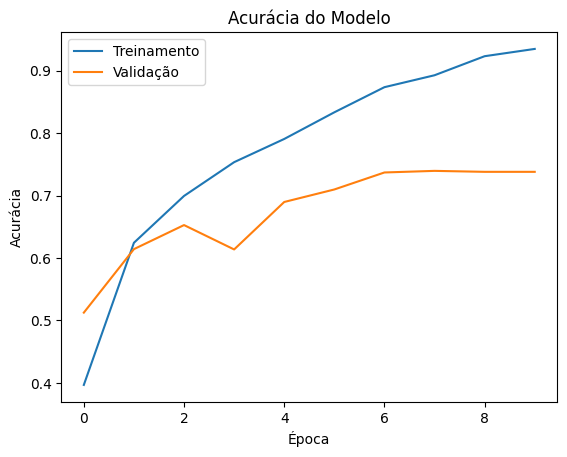

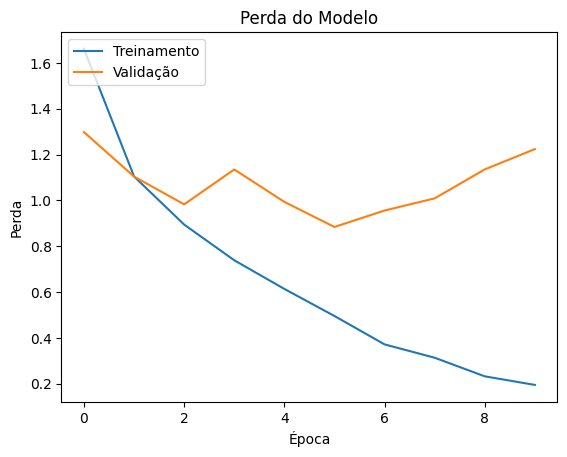

In [7]:
import matplotlib.pyplot as plt

# Gráfico de acurácia - mostra como a acurácia do modelo muda ao longo das épocas de treinamento
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Acurácia do Modelo')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(['Treinamento', 'Validação'], loc='upper left')
plt.show()

# Gráfico de perda - mostra como a perda do modelo muda ao longo das épocas de treinamento
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perda do Modelo')
plt.ylabel('Perda')
plt.xlabel('Época')
plt.legend(['Treinamento', 'Validação'], loc='upper left')
plt.show()